In [74]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [75]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 11,7

In [76]:
# Mileage per gallon performances of various cars

# origin: 
#     1 - USA
#     2 - Europe
#     3 - Japan

mpg = pd.read_csv('auto-mpg.csv')
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [77]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [78]:
mpg['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [79]:
mpg['horsepower'] = mpg['horsepower'].replace('?', np.NaN)
mpg['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', nan, '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [80]:
# исправлю тип данных 
mpg['horsepower'] = mpg['horsepower'].astype('float64')

In [81]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [82]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


Text(0.5, 1.0, 'Распределение количеств автомобилей по происхождению')

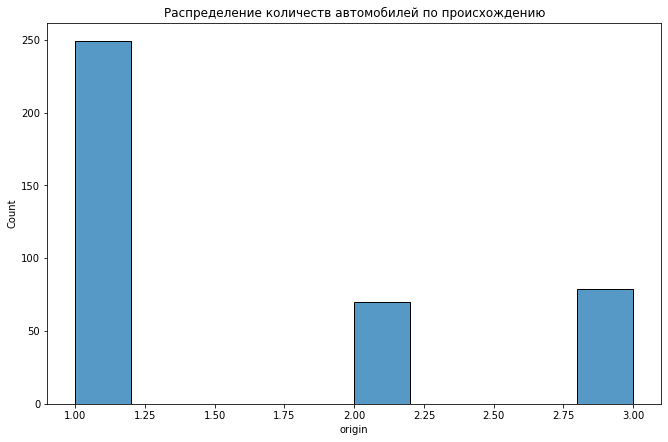

In [83]:
sns.histplot(mpg['origin'])
plt.title('Распределение количеств автомобилей по происхождению')

In [ ]:
Даёт представление о количествах автомобилей в зависимости от происхождения. 

<AxesSubplot:ylabel='Frequency'>

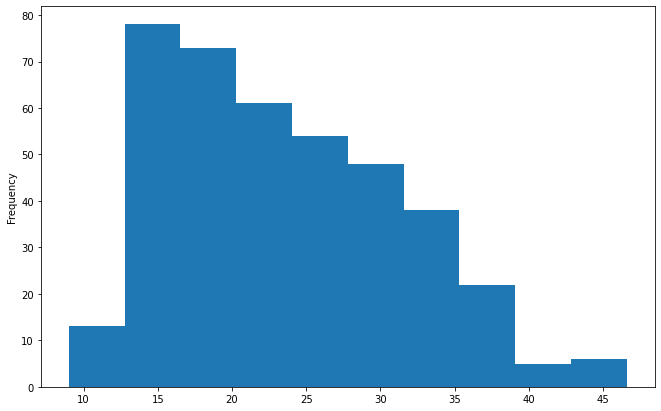

In [84]:
mpg["mpg"].plot(kind = 'hist')

Распределение интервалов расхода топлива

<AxesSubplot:title={'center':'Распределения расходов топлива по происхождениям авто'}, xlabel='mpg', ylabel='origin'>

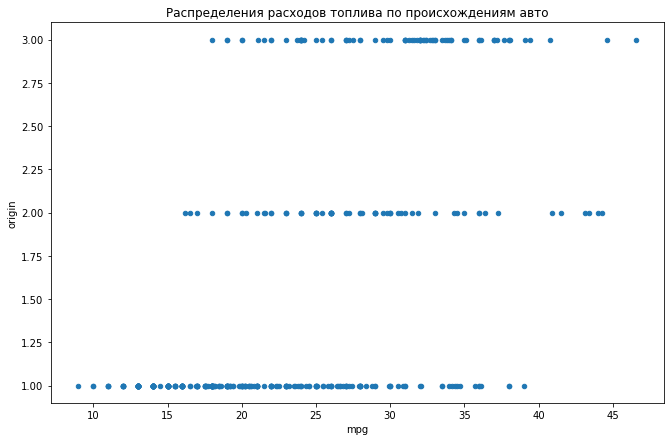

In [85]:
mpg.plot(kind='scatter', 
        x='mpg', 
        y='origin', 
        title='Распределения расходов топлива по происхождениям авто')

Из графика видно, что авто, произведенные в США, менее экономичны, чем европейские или японские автомобили. 
США после Второй мировой войны испытывали рост экономики, рост благосостояния граждан, соответственно, 
их автомобили отличались большим уровнем комфорта, а, также, мощностью двигателей. Расход топлива
американских автомобилей выше.

Вывод:

Есть взаимосвязь между происхождением автомобиля и расходом топлива.

<AxesSubplot:title={'center':'Распределения расходов топлива в зависимости от количества цилиндров'}, xlabel='mpg', ylabel='cylinders'>

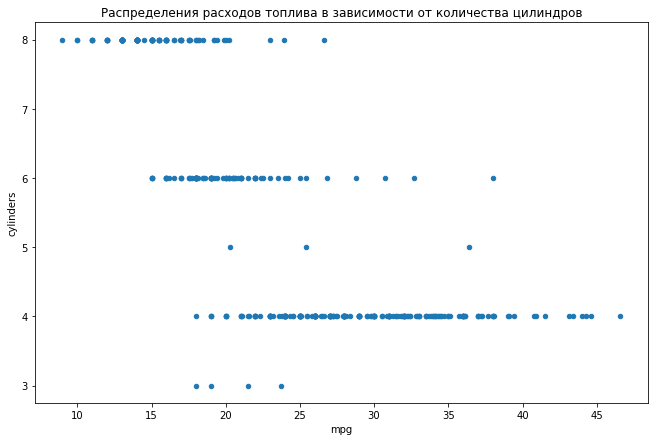

In [86]:
mpg.plot(kind='scatter', 
        x='mpg', 
        y='cylinders', 
        title='Распределения расходов топлива в зависимости от количества цилиндров')

Вывод:

Четырехцилиндровые двигатели более экономичны, чем шести- и восьмицилиндровые. Трех- и пятицилиндровых двигателей представлено мало в данном наборе, сложно делать какие-то выводы о них. Непонятно, почему их так мало представлено, возможно, такие изделия узконишевые, специфичные. 

<AxesSubplot:title={'center':'Расходы топлива в зависимости от масс автомобилей'}, xlabel='weight', ylabel='mpg'>

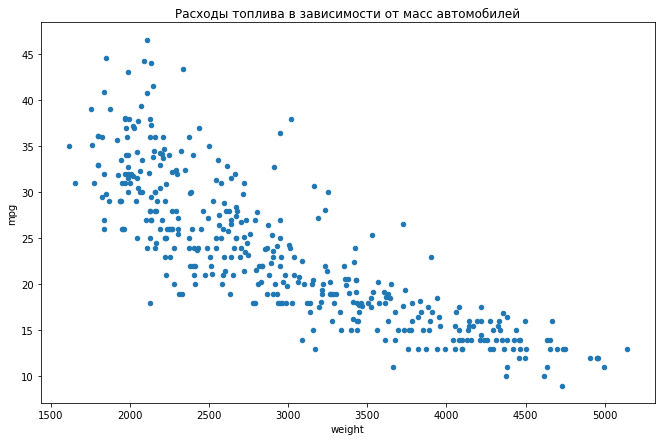

In [87]:
mpg.plot(kind='scatter', 
        x='weight', 
        y='mpg', 
        title='Расходы топлива в зависимости от масс автомобилей')

<AxesSubplot:title={'center':'Расходы топлива в зависимости от мощностей двигателей'}, xlabel='horsepower', ylabel='mpg'>

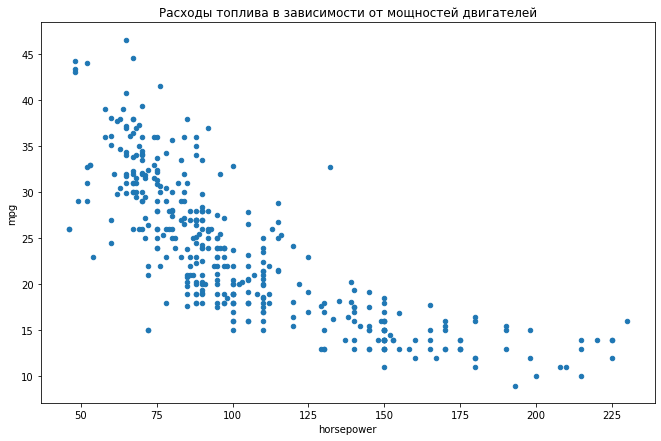

In [88]:
mpg.plot(kind='scatter', 
        x='horsepower', 
        y='mpg', 
        title='Расходы топлива в зависимости от мощностей двигателей')

Вывод:

Есть зависимость между мощностью и расходом. Более мощные двигатели требуют больше топлива.

<AxesSubplot:title={'center':'Расходы топлива в зависимости от объемов двигателей'}, xlabel='displacement', ylabel='mpg'>

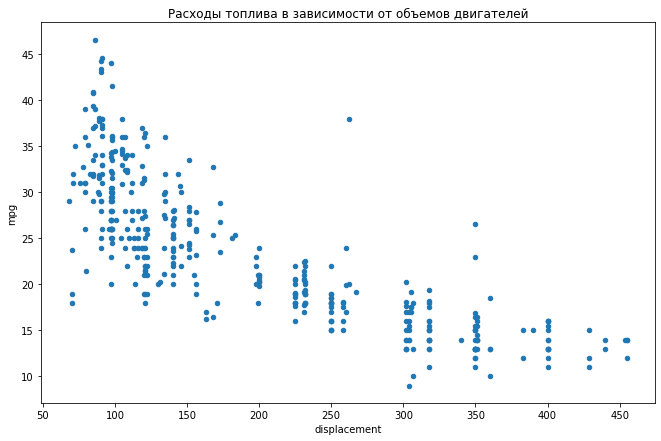

In [89]:
mpg.plot(kind='scatter', 
        x='displacement', 
        y='mpg', 
        title='Расходы топлива в зависимости от объемов двигателей')

Вывод:

Видна зависимость между расходами топлива и объемами двигателей, - чем больше объем, тем больше расход. Зависимость нелинейная. Присутствуют выбросы в небольшом количестве(?)

<AxesSubplot:title={'center':'Расходы топлива в зависимости от ускорений'}, xlabel='acceleration', ylabel='mpg'>

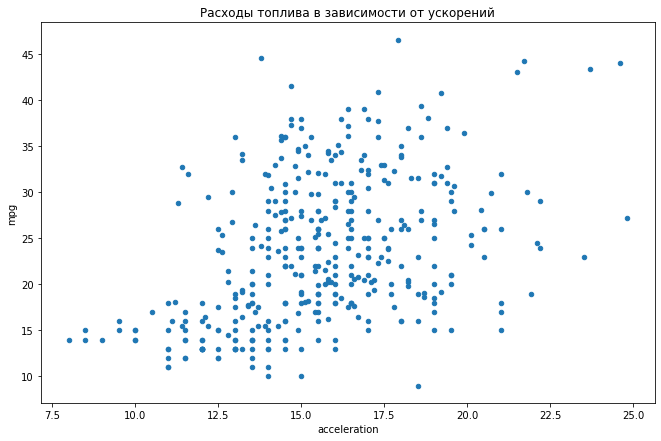

In [90]:
mpg.plot(kind='scatter', 
        x='acceleration', 
        y='mpg', 
        title='Расходы топлива в зависимости от ускорений')

Вывод:

Есть взаимосвязь расхода от разгона. "Спортивные" автомобили потребляют больше топлива. 

<AxesSubplot:title={'center':'Распределения расходов топлива в зависимости от года выпуска'}, xlabel='model year', ylabel='mpg'>

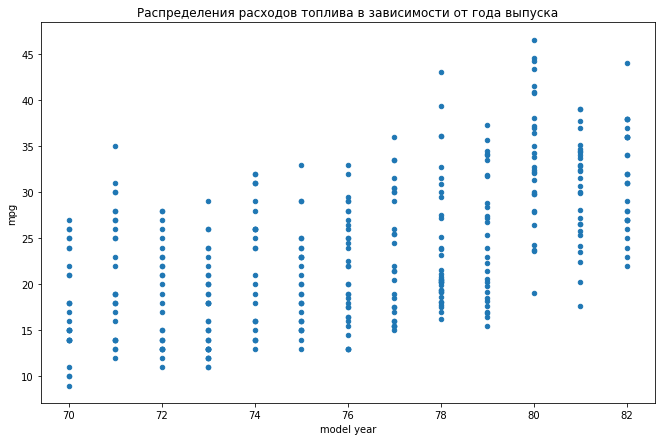

In [91]:
mpg.plot(kind='scatter', 
        x='model year', 
        y='mpg', 
        title='Распределения расходов топлива в зависимости от года выпуска')

Вывод:

Прослеживается стремление к созданию более экономичных автомобилей. Однако, вывод может быть ошибочным, потому что в наборе данных нет категорий, например, таких как Техническое состояние, Возраст автомобиля... 

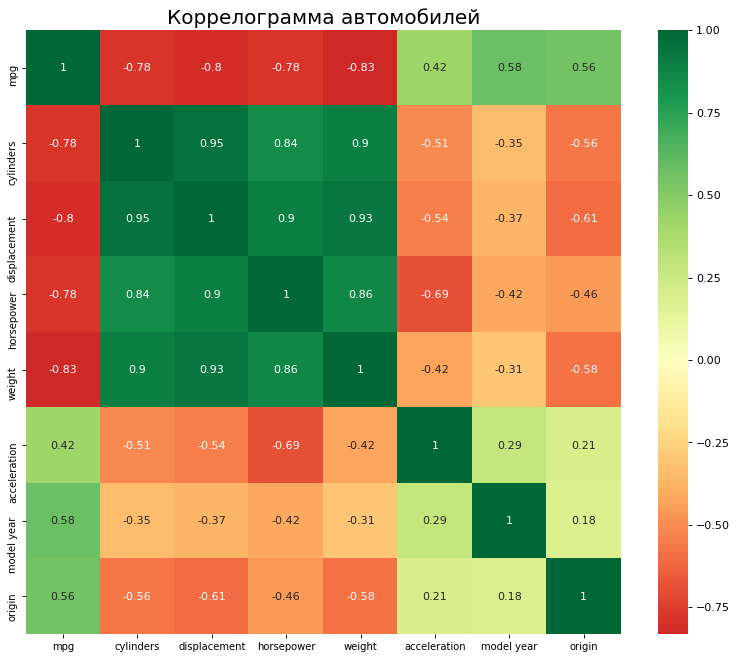

In [92]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(mpg.corr(), xticklabels=mpg.corr()\
            .columns, yticklabels=mpg.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Коррелограмма автомобилей', fontsize=18)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

Вывод:

Прямая зависимость (положительные значения):

0,95 - Самая сильная корреляция между объемом двигателя и количеством цилиндров.

0,93 - Объем двигателя и вес. Предполагаю, что многоцилиндровые двигатели в первую очередь нужны тяжелым (грузовым) автомобилям.

0,9 - количество цилиндров и вес. 

0,86 - вес и мощность. 

0,84 - количество цилиндров и мощность.

Обратная зависимость: 

-0,83 - расход топлива и вес. Здесь величина расхода выражена в милях/ галлон. Непривычная для нас величина, в РФ принято оценивать расход как литр/ километр. Поэтому в данном кейсе коэффициент корреляции отрицательный.

-0,8 - расход топлива и объем двигателя.

-0,78 - расход и мощность.

Предполагаю, что самая очевидная зависимость расхода топлива от веса автомобиля. 


